XGBoost (eXtreme Gradient Boosting) : 일반 gbm보다 빠름, 자체 과적합 규제 가능 (과적합에 강함), 병렬처리 가능

In [ ]:
# XGBoost 설명 및 특징

In [ ]:
%pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ----- ---------------------------------- 10.0/72.0 MB 50.9 MB/s eta 0:00:02
   --------- ------------------------------ 17.8/72.0 MB 43.7 MB/s eta 0:00:02
   ---------------- ----------------------- 29.4/72.0 MB 47.9 MB/s eta 0:00:01
   ------------------- -------------------- 34.6/72.0 MB 41.3 MB/s eta 0:00:01
   ------------------------ --------------- 44.3/72.0 MB 42.4 MB/s eta 0:00:01
   ---------------------------- ----------- 50.6/72.0 MB 40.6 MB/s eta 0:00:01
   -------------------------------- ------- 58.7/72.0 MB 41.3 MB/s eta 0:00:01
   ------------------------------------- -- 67.4/72.0 MB 40.7 MB/s eta 0:00:01
   ---------------------------------------- 72.0/72.0 MB 39.8 MB/s  0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import xgboost as xgb

In [ ]:
xgb.__version__

'3.1.1'

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import plot_importance

import matplotlib.pyplot as plt

In [ ]:
cancer = load_breast_cancer()

x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=1)

In [ ]:
# datasets
dtrain = xgb.DMatrix(data=x_train, label=y_train)
dtest = xgb.DMatrix(data=x_test, label=y_test)

In [ ]:
"""
max_dapth : tree의 최대 깊이
eta : learning_rate
objective : 분류 설정
    reg:linear -> 회귀
    multi:softmax -> 다항분류(클래스)
    multi:softprob -> 다항분류(확률)
eval_metric : 손실함수 (클래스 분류 - error / 다른 것들은? (숙제))    
"""

params = {
    "max_depth" : 3,
    "eta" : 0.1,
    "objective" : "binary:logistic",
    "eval_metric" : "error"
}

num_boost_round = 400

In [ ]:
# training / evaluation (valid, test)
data_list = [(dtrain, "train"), (dtest, "eval")]

xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_boost_round, evals=data_list)

[0]	train-error:0.37363	eval-error:0.36842
[1]	train-error:0.37363	eval-error:0.36842
[2]	train-error:0.05934	eval-error:0.14912
[3]	train-error:0.05055	eval-error:0.13158
[4]	train-error:0.04396	eval-error:0.12281
[5]	train-error:0.02198	eval-error:0.09649
[6]	train-error:0.01758	eval-error:0.07018
[7]	train-error:0.01538	eval-error:0.07018
[8]	train-error:0.01758	eval-error:0.06140
[9]	train-error:0.01758	eval-error:0.05263
[10]	train-error:0.01319	eval-error:0.05263
[11]	train-error:0.01099	eval-error:0.05263
[12]	train-error:0.01099	eval-error:0.05263
[13]	train-error:0.00659	eval-error:0.05263
[14]	train-error:0.00440	eval-error:0.05263
[15]	train-error:0.00440	eval-error:0.05263
[16]	train-error:0.00440	eval-error:0.05263
[17]	train-error:0.00440	eval-error:0.05263
[18]	train-error:0.00440	eval-error:0.05263
[19]	train-error:0.00220	eval-error:0.05263
[20]	train-error:0.00220	eval-error:0.05263
[21]	train-error:0.00220	eval-error:0.05263
[22]	train-error:0.00220	eval-error:0.0526

In [ ]:
predict = xgb_model.predict(dtest)
predict

array([8.27330947e-01, 1.42331999e-02, 9.99842882e-01, 1.79894443e-03,
       8.36179316e-01, 2.47739023e-04, 6.98755383e-02, 9.11691878e-03,
       9.97002661e-01, 9.98646080e-01, 9.97020543e-01, 7.39489798e-04,
       2.09742133e-03, 9.98809934e-01, 9.86189663e-01, 9.77102876e-01,
       9.99793351e-01, 9.99721825e-01, 9.94099259e-01, 8.17488646e-04,
       9.99296427e-01, 9.99904990e-01, 2.67864089e-04, 9.99563158e-01,
       4.24360187e-04, 9.97101605e-01, 9.77610290e-01, 1.55540940e-04,
       1.34636808e-04, 2.73203433e-01, 1.08201639e-04, 9.99858856e-01,
       1.00122706e-04, 1.33123191e-03, 9.95671988e-01, 9.99480069e-01,
       2.01076884e-02, 9.90445256e-01, 6.26315296e-01, 9.99715388e-01,
       9.99631882e-01, 9.99265254e-01, 9.90059495e-01, 9.99892473e-01,
       9.99846578e-01, 4.53318993e-04, 9.98299778e-01, 9.99739110e-01,
       9.94391859e-01, 1.80219397e-01, 3.50566086e-04, 1.30525278e-02,
       9.98532534e-01, 9.99778330e-01, 9.76539135e-01, 9.99842644e-01,
      

In [ ]:
predict_list = [1 if x > 0.5 else 0 for x in predict]
predict_list

[1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1]

In [ ]:
accuracy_score(y_test, predict_list)

0.956140350877193

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

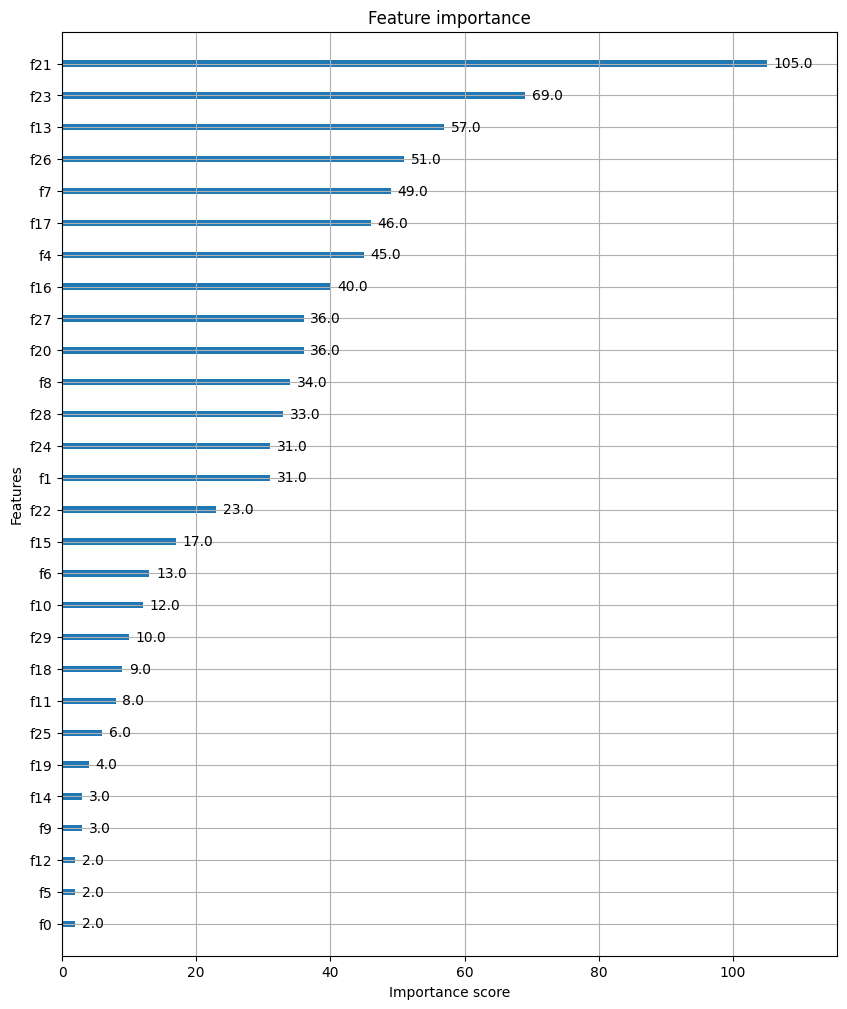

In [ ]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)